###                                                 <center>Predicting the Severity of Accidents in Seattle</center>
####                                    <center>Shwetha Acharya</center>
####                                                                                           <center>Oct 22, 2020</center>


### Introduction

#### 1.1	Background
In the recent past we have seen an increase in the number of road accidents in Seattle. While some of these accidents just cause property damage some are serious, resulting in heavy injuries and fatalities to drivers and passengers and pedestrians. With this trend, driving on highways and roads poses a risk to the lives of people. There may be different reasons for these accidents such as poor road conditions, light and weather conditions and so on. The idea is to use data science techniques to understand if we can predict the gravity of the accidents on account of collisions.

#### 1.2	Problem
Data that might contribute to determining accident severity might include road conditions, light and weather conditions, car speeding, drunken driving.  This project aims at predicting accident severity based on historic data.

#### 1.3	Interest
This analysis and prediction will help drivers and passengers of various vehicles such as trucks, cars as well as pedestrians taking these road routes as it will serve as a safety warning to them. In addition, it would help traffic cops monitoring these areas – making them more vigilant and taking steps to avoid collisions and accidents, thus saving/securing lives of people.


### 2.	Data Acquisition
2.1	Data Sources
Data for this study is taken from Seattle Department of Transportation - Traffic Management Division, Traffic Records Group**. It includes information on all types of collisions from 2004 till date (2020). The key features in the dataset encompass accident severity in terms of numeric codes, collision description, address type (whether intersection, alley or block), X and Y co-ordinates, number of vehicles and pedestrians involved, light, road and weather conditions, speeding, whether driving under the influence.


Importing the libraries required for data analysis

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import xgboost as xgb


Load the dataset

In [62]:
file='C:\Python_Projects\Data Analytics\capstone\Data-Collisions.csv'
df=pd.read_csv(file)
df.head()

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Cleaning

In [63]:
df.shape

(194673, 38)

There are 37 attributes and the target label(Y) is severity code. Lets examine each of these attributes and see if we can drop any features

In [64]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [65]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


Lets examine dataset for null values

In [66]:
df.isnull().sum().sort_values(ascending=False)*100/df.shape[0]

PEDROWNOTGRNT     97.602646
EXCEPTRSNDESC     97.103861
SPEEDING          95.205807
INATTENTIONIND    84.689710
INTKEY            66.574718
EXCEPTRSNCODE     56.434123
SDOTCOLNUM        40.959455
JUNCTIONTYPE       3.251093
Y                  2.739979
X                  2.739979
LIGHTCOND          2.655736
WEATHER            2.610018
ROADCOND           2.574574
ST_COLDESC         2.519096
COLLISIONTYPE      2.519096
UNDERINFL          2.508822
LOCATION           1.375126
ADDRTYPE           0.989351
ST_COLCODE         0.009246
INCKEY             0.000000
STATUS             0.000000
REPORTNO           0.000000
COLDETKEY          0.000000
OBJECTID           0.000000
HITPARKEDCAR       0.000000
PEDCYLCOUNT        0.000000
SEVERITYCODE.1     0.000000
SEVERITYDESC       0.000000
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
CROSSWALKKEY       0.000000
VEHCOUNT           0.000000
INCDATE            0.000000
INCDTTM            0.000000
SDOT_COLCODE       0.000000
SDOT_COLDESC       0

Dropping columns with more than 65% null values - SPEEDING, INTKEY , PEDROWNOTGRNT , EXCEPTRSNDESC, INATTENTIONIND <br>
Though Speeding and Inattention are important factors, we cannot proceed with these features due to very high null values

We can drop columns that have no impact on the accident severity. We see that below columns have no influence.<br>

'SEVERITYDESC', - This is a description of the class.Numerical values are captured in SEVERITYCODE. <br>
'SEVERITYCODE.1' - This is a duplicate column<br>
'EXCEPTRSNCODE'/'EXCEPTRSNDESC' - No information provided<br>
'OBJECTID' - Unique key to identify every row.<br>
'REPORTNO' - No impact on accident predictions. It is a report number<br>
'INCDATE'- Duplicate column, Date and Time are captured in INCDTTM.<br>
'INCKEY' - Unique key to identify<br>
'COLDETKEY' - Unique key to identify each collisions<br>
'ST_COLDESC' - Descriptive field/data is already represented by ST_COLCODE<br>
'SDOT_COLDESC' - Descriptive field/data is already represented by SDOT_COLCODE<br>
'STATUS' - No information provided<br>
'INTKEY' - Key given for the intersections, nearly 67% is null<br>
'LOCATION' - Descriptive field and already represented by X and Y co-ordinates<br>
'ST_COLCODE' - This is almost a duplicate field of SDOT_COLCODE. Since State collision code has few null values, dropping this column<br>
'ADDRTYPE' - Junctiontype column gives a better description on the type of address and this column has only high level information <br>

In [67]:
print(df.OBJECTID.nunique())
print(df.INCKEY.nunique())
print(df.COLDETKEY.nunique())
print(df.REPORTNO.nunique())

194673
194673
194673
194670


In [68]:
#Dropping columns with more than 80% null values
df.drop(columns=['SPEEDING'  ,'PEDROWNOTGRNT','EXCEPTRSNDESC', 'INATTENTIONIND'], inplace=True)

#Dropping columns that have no impact on the accident severity
df.drop(columns=['SEVERITYDESC','SEVERITYCODE.1','EXCEPTRSNCODE', 'OBJECTID', 'REPORTNO', 'INCDATE','INCKEY', 'INTKEY', 'COLDETKEY','SDOTCOLNUM', 'ST_COLDESC', 'SDOT_COLDESC', 'STATUS', 'LOCATION', 'ST_COLCODE', 'ADDRTYPE'], inplace=True)

Converting INCDTTM to DateTime column and getting the hour of the day for the accidents and checking if the days on which accidents have happened are weekends are not

In [69]:
df.INCDTTM=pd.to_datetime(df.INCDTTM)
df['HOUR']=df.INCDTTM.dt.hour
df['day']=df.INCDTTM.dt.dayofweek
df['WEEKEND']=df.day.apply(lambda x: 1 if x >3 else 0)
df.drop(columns=['INCDTTM', 'day'], inplace=True)

In [70]:
df.sample(3)

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,HOUR,WEEKEND
49380,1,-122.353831,47.617699,Left Turn,2,0,0,2,At Intersection (intersection related),11,0,Clear,Dry,Daylight,0,0,N,0,0
139268,1,-122.326529,47.678713,Parked Car,2,0,0,2,Mid-Block (not related to intersection),0,N,Unknown,NaN,Daylight,0,0,Y,17,1
40075,2,-122.270155,47.536444,Other,2,0,0,2,Driveway Junction,11,0,Raining,Wet,Daylight,0,0,N,7,0


In [71]:
df.isnull().sum().sort_values()

SEVERITYCODE        0
HITPARKEDCAR        0
CROSSWALKKEY        0
SEGLANEKEY          0
HOUR                0
VEHCOUNT            0
SDOT_COLCODE        0
PEDCOUNT            0
PERSONCOUNT         0
PEDCYLCOUNT         0
WEEKEND             0
UNDERINFL        4884
COLLISIONTYPE    4904
ROADCOND         5012
WEATHER          5081
LIGHTCOND        5170
Y                5334
X                5334
JUNCTIONTYPE     6329
dtype: int64

Dropping empty null records

In [72]:
df.dropna(inplace=True)

In [73]:
print(df.isnull().sum())
print(df.shape)

SEVERITYCODE     0
X                0
Y                0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLCODE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SEGLANEKEY       0
CROSSWALKKEY     0
HITPARKEDCAR     0
HOUR             0
WEEKEND          0
dtype: int64
(180067, 19)


### Exploratory Data Analysis

SEVERITYCODE is our target label / Y. We need to find the distribution of classes 

In [74]:
df.SEVERITYCODE.value_counts(normalize=True)

1    0.690065
2    0.309935
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:>

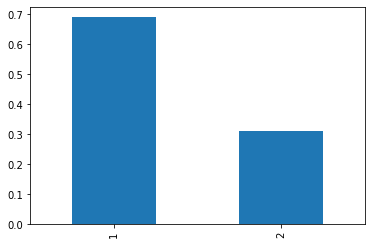

In [75]:
df.SEVERITYCODE.value_counts(normalize=True).plot(kind="bar")

There are 2 classes:<br> 
1 - Property Damage <br> 
2 - Injury<br> 
Majority of the observations are type 1 and hence data is slightly imbalanced

Model performance is affected by imbalance in the classes so we will under-sample the dominant class to rebalance the dataset. The resulting dataset will be smaller, but this will actually make the computations faster.

In [76]:
sev2 = len(df[df.SEVERITYCODE == 2])

sev1_ind = df[df.SEVERITYCODE == 1].index
sev2_ind = df[df.SEVERITYCODE == 2].index

rand_indices = np.random.choice(sev1_ind,sev2, replace=False)

under_sample_indices = np.concatenate([sev2_ind,rand_indices])
data = df.loc[under_sample_indices]
data.sample(3)

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,HOUR,WEEKEND
83963,2,-122.316579,47.661292,Angles,3,0,0,2,At Intersection (intersection related),11,N,Clear,Dry,Daylight,0,0,N,11,0
132726,1,-122.316845,47.614682,Parked Car,2,0,0,2,Mid-Block (not related to intersection),14,N,Clear,Dry,Unknown,0,0,N,16,0
27690,2,-122.331215,47.600878,Left Turn,6,0,0,5,At Intersection (intersection related),11,1,Clear,Dry,Dark - Street Lights On,0,0,N,1,0


<AxesSubplot:>

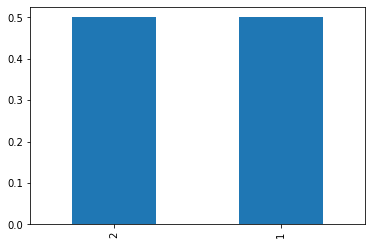

In [77]:
data.SEVERITYCODE.value_counts(normalize=True).plot(kind="bar")

Now both types are balanced

In [78]:
print(data.shape)
data.dtypes

(111618, 19)


SEVERITYCODE       int64
X                float64
Y                float64
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
HOUR               int64
WEEKEND            int64
dtype: object

Data Cleaning to fix data types of the some of the columns 

In [79]:
data.UNDERINFL.replace(to_replace=['Y', 'N'], value=[1,0], inplace=True)
data.UNDERINFL=data.UNDERINFL.astype("int")
data.UNDERINFL.value_counts()

0    105658
1      5960
Name: UNDERINFL, dtype: int64

In [80]:
data.HITPARKEDCAR.replace(to_replace=['Y', 'N'], value=[1,0], inplace=True)
data.HITPARKEDCAR=data.HITPARKEDCAR.astype("int")
data.HITPARKEDCAR.value_counts()

0    108808
1      2810
Name: HITPARKEDCAR, dtype: int64

<AxesSubplot:xlabel='HOUR'>

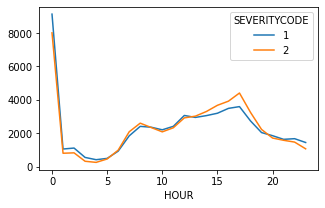

In [81]:
pd.crosstab(data.HOUR, data.SEVERITYCODE).plot(kind="line", figsize=(5,3))

At midnight and in the afternoon/early evening, number of accident cases is on the higher side. At early evening, injury causing accidents are more.

<AxesSubplot:xlabel='WEEKEND'>

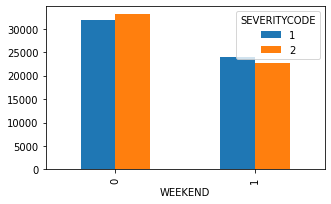

In [82]:
pd.crosstab(data.WEEKEND, data.SEVERITYCODE).plot(kind="bar", figsize=(5,3))

On Weekends, comparitively less number of accidents . Out of these, we see equal proportion of property damage and injury based accidents be it weekends or weekdays

<AxesSubplot:xlabel='JUNCTIONTYPE'>

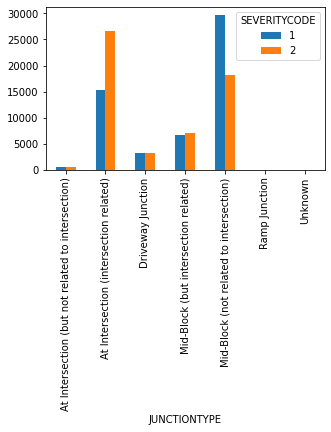

In [83]:
pd.crosstab(data.JUNCTIONTYPE, data.SEVERITYCODE).plot(kind="bar", figsize=(5,3))

Property damage is maximum with accidents at Midblock, while at intersection injury resulting accidents are maximum .

<AxesSubplot:xlabel='WEATHER'>

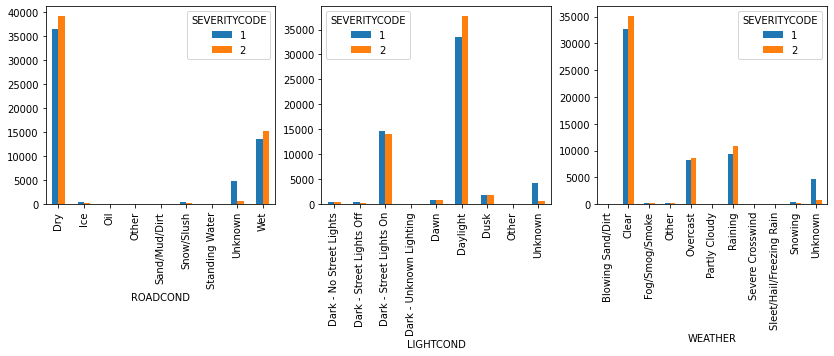

In [84]:
plt.figure(1)
plt.subplot(2,3,1)
pd.crosstab(data.ROADCOND, data.SEVERITYCODE).plot(kind="bar", ax=plt.gca(), figsize=(14,8)) 
plt.subplot(2,3,2)
pd.crosstab(data.LIGHTCOND, data.SEVERITYCODE).plot(kind="bar", ax=plt.gca())
plt.subplot(2,3,3)
pd.crosstab(data.WEATHER, data.SEVERITYCODE).plot(kind="bar", ax=plt.gca())


**Majority of accidents seem to happen when roads are dry in daylight and clear weather**

array([[<AxesSubplot:title={'center':'CROSSWALKKEY'}>,
        <AxesSubplot:title={'center':'HITPARKEDCAR'}>,
        <AxesSubplot:title={'center':'HOUR'}>,
        <AxesSubplot:title={'center':'PEDCOUNT'}>],
       [<AxesSubplot:title={'center':'PEDCYLCOUNT'}>,
        <AxesSubplot:title={'center':'PERSONCOUNT'}>,
        <AxesSubplot:title={'center':'SDOT_COLCODE'}>,
        <AxesSubplot:title={'center':'SEGLANEKEY'}>],
       [<AxesSubplot:title={'center':'SEVERITYCODE'}>,
        <AxesSubplot:title={'center':'UNDERINFL'}>,
        <AxesSubplot:title={'center':'VEHCOUNT'}>,
        <AxesSubplot:title={'center':'WEEKEND'}>],
       [<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

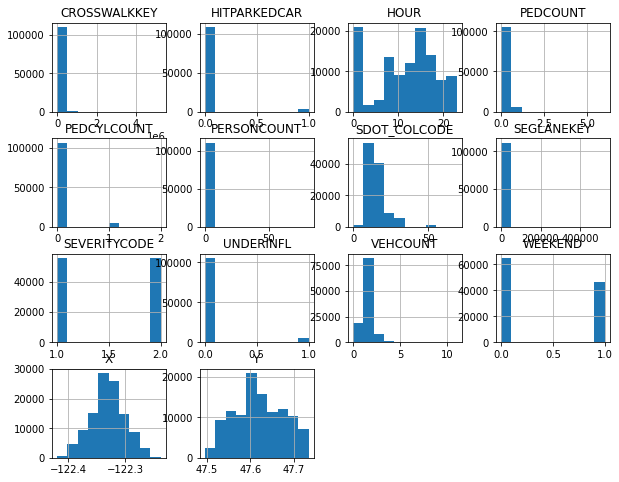

In [85]:
data.hist(figsize=(10,8))


Following features do not show much variation. They seem to be constant<br>
'SEGLANEKEY', 
'CROSSWALKKEY',
'HITPARKEDCAR'

<AxesSubplot:xlabel='X', ylabel='Y'>

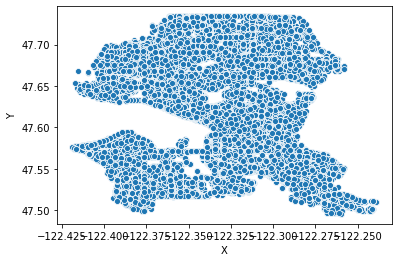

In [86]:
sns.scatterplot(data.X, data.Y)

seattle_map=folium.Map(location=[47.608013, -122.335167], zoom_start=11)
acc_loc_pair=list(zip(data.Y, data.X))
acc_location_list=[[item1, item2] for (item1,item2) in acc_loc_pair]
for i in range(0, len(acc_location_list)):
    folium.CircleMarker(acc_location_list[i], color ='#6ccc31').add_to(seattle_map)
seattle_map



Plotting X and Y co-ordinates on a map, I see that accident locations are spread across Seattle. Almost all areas are covered.<br>

In [87]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR', 'HOUR', 'WEEKEND'],
      dtype='object')

Converting categorical variables to numeric data using one hot coding method

In [88]:
df_X1 = pd.get_dummies(data[['ROADCOND','WEATHER','LIGHTCOND', 'JUNCTIONTYPE', 'COLLISIONTYPE']],drop_first=True)
data.drop(['ROADCOND','WEATHER','LIGHTCOND', 'JUNCTIONTYPE', 'COLLISIONTYPE'],axis=1,inplace=True)
df_master = pd.concat([df_X1,data], axis=1)
df_master.sample(3)


,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,...,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,HOUR,WEEKEND
84584,0,0,0,0,0,0,0,1,0,0,...,0,0,2,14,0,0,0,0,9,0
131599,0,0,0,0,0,0,0,0,1,0,...,0,0,3,26,1,0,0,0,2,1
72821,0,0,0,0,0,0,0,0,0,0,...,0,0,2,14,0,0,0,0,7,0


### Feature Selection

Picking our target variable - SEVERITYCODE

In [29]:
y=df_master.SEVERITYCODE.values
df_master.drop(columns=['SEVERITYCODE'], inplace=True)

In [30]:
df_master.columns

Index(['ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other',
       'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'COLLISIONTYPE_Cycles', 

There are 55 attributes now and we need to perform some feature selection to pick the ones that influence the severity code. We will perform chi squared test on the categorical variables and get the p-values. Features with p-value > 0.05 can be rejected because greater p-value indicates no relationship between the target and itself.

**Feature selection using chi2 test**

In [31]:
chi_features=['ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other',
       'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'WEATHER_Unknown',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'UNDERINFL', 'WEEKEND', 'SDOT_COLCODE']

X_chi=df_master[chi_features].values
print(X_chi.shape, X_chi[0:3])


(111618, 44) [[ 0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0
   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 51]]


ROADCOND_Other                        1.000000
LIGHTCOND_Dark - Unknown Lighting     1.000000
WEATHER_Sleet/Hail/Freezing Rain      0.789268
ROADCOND_Sand/Mud/Dirt                0.757621
WEATHER_Severe Crosswind              0.617075
JUNCTIONTYPE_Unknown                  0.563703
WEATHER_Fog/Smog/Smoke                0.424656
WEATHER_Partly Cloudy                 0.317311
JUNCTIONTYPE_Ramp Junction            0.317311
ROADCOND_Oil                          0.223017
ROADCOND_Standing Water               0.204084
LIGHTCOND_Dawn                        0.029722
JUNCTIONTYPE_Driveway Junction        0.027780
LIGHTCOND_Dark - Street Lights Off    0.022343
dtype: float64


<AxesSubplot:>

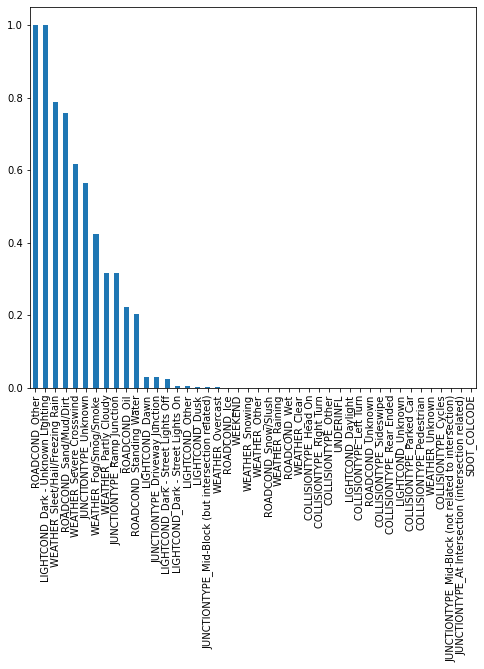

In [32]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X_chi,y)
p_values = pd.Series(chi_scores[1],index = chi_features)
p_values.sort_values(ascending = False , inplace = True)
print(p_values[0:14]) #selecting top 14
plt.figure(figsize=(8,7))
p_values.plot.bar()


Based on chi squared test results, we rejected features with p-value > 0.05. Also, 'SEGLANEKEY', 'CROSSWALKKEY',
'HITPARKEDCAR' are almost constant for the whole dataset. These features do not show any patterns of variation. 

In [33]:
X_master=df_master[['ROADCOND_Ice', 'ROADCOND_Snow/Slush',
       'ROADCOND_Unknown', 'ROADCOND_Wet',
       'WEATHER_Clear', 'WEATHER_Other',
       'WEATHER_Overcast',  'WEATHER_Raining',
               'WEATHER_Snowing', 'WEATHER_Unknown',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dawn','LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown','JUNCTIONTYPE_At Intersection (intersection related)',
              'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
        'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'UNDERINFL', 'HOUR', 'WEEKEND']].values

**Data Normalization**

In [34]:
X=StandardScaler().fit(X_master).transform(X_master)
print(X[0:2], X.shape)
y[0:5]

[[-0.07741788 -0.06959422 -0.22744227  1.69030851 -1.24283465 -0.05883199
   2.38447359 -0.47086244 -0.0661983  -0.22946116 -0.07753491 -0.58846194
  -0.11785059  0.75320405 -0.18303005 -0.0305388  -0.21546529  1.28440082
  -0.37551077 -0.86578329 -0.21589747 -0.10968959 -0.29855776 -0.3619021
  -0.47649068 -0.24083303 -0.50295759 -0.12234151 -0.30210327  0.24001068
   1.46188842 -0.39138977 -0.24083444 -0.21610893  0.07318514 -0.53060707
  -0.23501047  0.35776752 -0.84645555]
 [-0.07741788 -0.06959422 -0.22744227  1.69030851 -1.24283465 -0.05883199
  -0.41937978  2.12376253 -0.0661983  -0.22946116 -0.07753491 -0.58846194
  -0.11785059  0.75320405 -0.18303005 -0.0305388  -0.21546529  1.28440082
  -0.37551077 -0.86578329 -0.21589747 -0.10968959 -0.29855776 -0.3619021
  -0.47649068 -0.24083303 -0.50295759 -0.12234151 -0.30210327  0.79992853
  -1.30135139 -0.39138977 -0.24083444 -0.21610893  0.07318514 -0.53060707
  -0.23501047 -0.51425907 -0.84645555]] (111618, 39)


array([2, 2, 2, 2, 2], dtype=int64)

Splitting dataset into Training and Test sets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test=train_test_split(X_master,y,test_size=0.3, random_state=42)
X_train.shape, y_train.shape

((78132, 39), (78132,))

### Modeling and Evaluation

**Classification algorithms that we will be running**<br>

1. Decision Trees
2. RandomForest Classifier
3. SVM
4. Logistic Regression

#### DecisionTrees

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, class_weight="balanced")
dt.fit(X_train, y_train)
yhat=dt.predict(X_test)
print(yhat[0:20])
print(accuracy_score(y_test,yhat ))
print(f1_score(y_test, dt.predict(X_test), average="weighted"))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt, X_test, y_test, cv=10)
print(scores)
scores.mean()

[1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1]
0.7059368094128889
0.6995288385217706
[0.70856972 0.69722305 0.70797253 0.69513288 0.70468797 0.69244551
 0.69235364 0.6911589  0.70728793 0.70131422]


0.6998146346579678

[[ 9326  7319]
 [ 2528 14313]]


<AxesSubplot:>

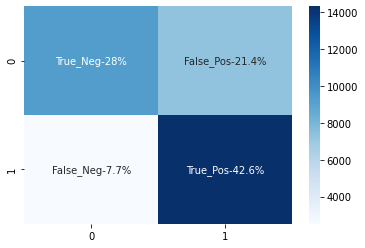

In [37]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,dt.predict(X_test))
print(cnf)
labels = ['True_Neg-28%','False_Pos-21.4%','False_Neg-7.7%','True_Pos-42.6%']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels, fmt='', cmap="Blues")

We get an accuracy of 70% with decision trees - which is good score.  In the confusion matrix, we see a high percentage of False-Positives - around 21%. We will run other algorithms and evaluate accuracy

### RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier(criterion='entropy', n_estimators=70, random_state = 50, max_depth=15)
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))
print(f1_score(y_test, rf.predict(X_test)))


scores=cross_val_score(rf, X_test, y_test, cv=10)
scores.mean()

0.7114316430747178
0.6789594338682348


0.7078481049461794

### Logistic Regression

0.7013080093173266
0.6980625601638896
0.5454316215760889
[[ 9957  6688]
 [ 3314 13527]]


<AxesSubplot:>

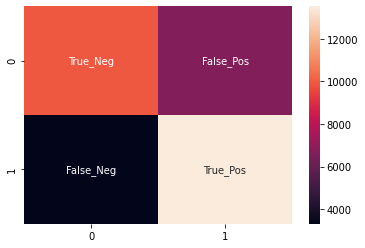

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score,f1_score,accuracy_score, log_loss
lr=LogisticRegression(solver='liblinear', C=0.9)
lr.fit(X_train, y_train)
print(accuracy_score(y_test, lr.predict(X_test)))
print(f1_score(y_test, lr.predict(X_test), average='weighted'))
print(log_loss(y_test, lr.predict_proba(X_test)))


cnf=confusion_matrix(y_test,lr.predict(X_test))
print(cnf)
labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels, fmt='')

In [40]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr, X_test, y_test, cv=10)
scores.mean()

0.700232803672203

### SVM

In [41]:
from sklearn import svm
svm_model=svm.SVC(kernel="linear", C=0.1)
svm_model.fit(X_train, y_train)
accuracy_score(y_test, svm_model.predict(X_test))

0.7013378725437496

In [ ]:
print(f1_score(y_test, svm_model.predict(X_test), average='weighted'))
scores=cross_val_score(svm_model, X_test, y_test, cv=10)
scores.mean()

0.6981210594083272


**XGBOOST**

In [57]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xg_model = xgb.XGBRFClassifier(learning_rate=0.1, max_depth=15, n_estimators=70)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, xg_model.predict(X_test), average='weighted'))
    

0.7102072507913755
0.7068646121704952


In [58]:
scores=cross_val_score(xg_model, X_train, y_train, cv=10)
print(scores)
scores.mean()

[0.70450474 0.70693627 0.70203507 0.7171381  0.70600282 0.70293101
 0.71470626 0.71432228 0.70907462 0.70369896]


0.7081350129143309

### Evaluation

Accuracy_score, f1 score , confusion matrix and cross validation scores were used to evaludate models and we see that  models exhibit an accuracy of around 70-71% with Decision trees, XGBOOST, RandomForest Trees and logistic regression with slight variation.<br>
Of all the models, Random Forest Classifier performs the best - 71% accuracy. However, there is room for improvement for these models. The confusion matrix shows misclassification in False Positives category


| Classification Model |Accuracy |	F1-Score |	Cross Val Score	| Log Loss |
| --- | --- | --- |---|--- |
DecisionTrees |	0.706	|0.699|	0.6998|	NA
RandomForest | 0.71	|0.678|	0.7	|NA
SVM|	0.7|	0.698|		|NA
Logistic Regression|	0.702|	0.698|	0.7|	0.54
XGBoost Random Forest Classifier	|0.7146	|0.706|	0.7|	NA



### Conclusion


In this study, we analyzed the relationship between accident severity and general environment conditions and the road lanes. We identified that some of the weather, road, light conditions, are among the most important features that affect the severity. Classification models were built to predict the severity of accidents and this information can be very useful to people taking the corresponding routes and to the traffic department.Model accuracy can be improved by getting data on other features such as attention indicators and speeding, driver’s profile, vehicle working status or any related events which may lead to distraction/deviation.